In [7]:
%pip install seaborn --user

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [9]:
# Import data
df = pd.read_csv('beach_vb.csv')
# Remove timestamp column
df = df.drop(columns=['Timestamp'])
# Drop empty first row
df = df.drop([0])

# Convert all team names to lowercase
df['Team Name/Number'] = df['Team Name/Number'].str.lower()

df.shape
# (Observations, Columns)

(21, 20)

In [10]:
df.nunique()

Team Name/Number                                                                            4
Pre-condition                                                                               2
Score after point                                                                          20
How was the point determined (responsibility)?                                              2
Which player(s) on team being observed was responsible for winning or losing the point?     5
How was the point won/lost?                                                                 4
Quality of Point                                                                            5
Type of Interaction                                                                        11
Quality of High-Fives / Physical Interaction                                                5
Quality of Verbal Interaction                                                               4
Who high-fived who? [Setter]                                

In [11]:
# Rename columns for consistency
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['team_name/number', 'pre-condition_', 'score_after_point',
       'how_was_the_point_determined_(responsibility)?',
       'which_player(s)_on_team_being_observed_was_responsible_for_winning_or_losing_the_point?',
       'how_was_the_point_won/lost?', 'quality_of_point',
       'type_of_interaction', 'quality_of_high-fives_/_physical_interaction',
       'quality_of_verbal_interaction', 'who_high-fived_who?_[setter]',
       'who_high-fived_who?_[outside_hitter]',
       'who_high-fived_who?_[rightside_hitter]',
       'who_high-fived_who?_[middle]', 'who_talked_to_who?_[setter]',
       'who_talked_to_who?_[outside_hitter]',
       'who_talked_to_who?_[rightside_hitter]', 'who_talked_to_who?_[middle]',
       'length_of_play', 'team_sex'],
      dtype='object')

In [12]:
# Find NaN values
df.isna().sum()

team_name/number                                                                            0
pre-condition_                                                                              0
score_after_point                                                                           0
how_was_the_point_determined_(responsibility)?                                              0
which_player(s)_on_team_being_observed_was_responsible_for_winning_or_losing_the_point?     0
how_was_the_point_won/lost?                                                                 0
quality_of_point                                                                            0
type_of_interaction                                                                         0
quality_of_high-fives_/_physical_interaction                                                0
quality_of_verbal_interaction                                                               1
who_high-fived_who?_[setter]                                

In [13]:
df.head()

,team_name/number,pre-condition_,score_after_point,how_was_the_point_determined_(responsibility)?,which_player(s)_on_team_being_observed_was_responsible_for_winning_or_losing_the_point?,how_was_the_point_won/lost?,quality_of_point,type_of_interaction,quality_of_high-fives_/_physical_interaction,quality_of_verbal_interaction,who_high-fived_who?_[setter],who_high-fived_who?_[outside_hitter],who_high-fived_who?_[rightside_hitter],who_high-fived_who?_[middle],who_talked_to_who?_[setter],who_talked_to_who?_[outside_hitter],who_talked_to_who?_[rightside_hitter],who_talked_to_who?_[middle],length_of_play,team_sex
1,yellow,Point Won,1-0,Successful Offense,Right Side Hitter,Hit,4.0,"HF (High-Five), PS (Physical Support), VS (Ver...",4.0,3.0,"Setter, Outside Hitter, Rightside Hitter, Back...","Setter, Rightside Hitter, Back row","Setter, Outside Hitter, Back row","Setter, Outside Hitter, Rightside Hitter",Rightside Hitter,NaN,Setter,NaN,2.0,Female
2,yellow,Point Won,3-1,Mistake,Right Side Hitter,Hit,1.0,"HF (High-Five), PS (Physical Support), VS (Ver...",2.0,2.0,"Setter, Outside Hitter, Rightside Hitter, Back...","Setter, Outside Hitter, Rightside Hitter, Back...","Setter, Outside Hitter, Rightside Hitter, Back...","Setter, Outside Hitter, Rightside Hitter, Back...",NaN,NaN,NaN,"Setter, Outside Hitter, Rightside Hitter, Back...",3.0,Female
3,yellow,Point Lost,4-3,Successful Offense,Outside Hitter,Hit,4.0,"HF (High-Five), VS (Verbal Support)",1.0,1.0,Back row,Back row,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Female
4,yellow,Point Won,7-4,Successful Offense,Back-row,Hit,3.0,"HF (High-Five), PS (Physical Support), VC (Ver...",2.0,2.0,Back row,Back row,Back row,Setter,Back row,NaN,NaN,Setter,1.0,Female
5,yellow,Point Won,9-4,Successful Offense,Setter,Block,4.0,"HF (High-Five), PS (Physical Support), VS (Ver...",4.0,4.0,"Setter, Outside Hitter, Rightside Hitter, Back...",Setter,"Setter, Rightside Hitter",Setter,Setter,NaN,Setter,Setter,3.0,Female


C:\Users\trist\AppData\Local\Temp\ipykernel_30608\395602644.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['high_five_count'] = df[high_five_columns].applymap(count_high_fives).sum(axis=1)
C:\Users\trist\AppData\Local\Temp\ipykernel_30608\395602644.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_high_fives_per_point_per_gender.index, y=average_high_fives_per_point_per_gender.values, palette='viridis')


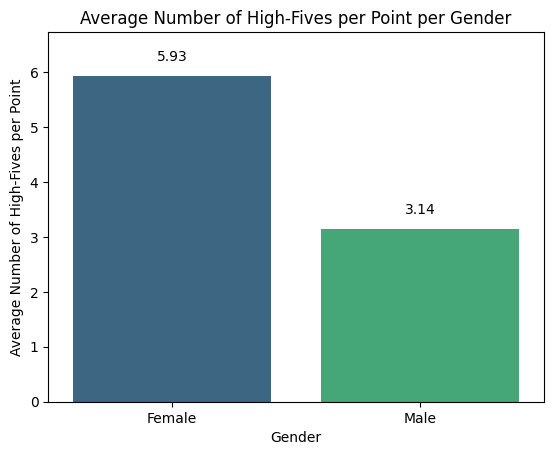

In [14]:
# AVERAGE NUMBER OF HIGH-FIVES PER POINT FOR EACH GENDER
high_five_columns = [col for col in df.columns if 'who_high-fived_who?' in col]
# Define a function to count high-fives based on the strings in the cells
def count_high_fives(cell):
    # Split the string by commas and count the non-empty elements
    if pd.isna(cell) or cell == '':
        return 0
    return len(cell.split(','))
# Select columns that contain high-five data
high_five_columns = [col for col in df.columns if 'who_high-fived_who?' in col]
# Apply the count_high_fives function to each cell in the high-five columns
df['high_five_count'] = df[high_five_columns].applymap(count_high_fives).sum(axis=1)
# Group by 'team_sex' and calculate the total number of high fives
total_high_fives_by_gender = df.groupby('team_sex')['high_five_count'].sum()
# Find total number of rows for each gender
total_rows = df.groupby('team_sex')['high_five_count'].count()
# # Calculate the average number of high-fives per point per gender
average_high_fives_per_point_per_gender = total_high_fives_by_gender / total_rows

# PLOTTING
ax = sns.barplot(x=average_high_fives_per_point_per_gender.index, y=average_high_fives_per_point_per_gender.values, palette='viridis')
# Add title and labels
plt.title('Average Number of High-Fives per Point per Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of High-Fives per Point')
# Loop over the bars and add the data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.1),  # The 0.1 adds a slight height to the annotations
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')
# Adjust the y-axis to add more space at the top of the plot
ymax = ax.get_ylim()[1]  # Get current maximum y-value
ax.set_ylim(top=ymax + 0.5)  # Increase maximum y-value to make room for annotations
plt.show()

C:\Users\trist\AppData\Local\Temp\ipykernel_30608\2785234113.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df['verbal_encouragement_count'] = df[verbal_encouragement_columns].applymap(count_verbal_interactions).sum(axis=1)
C:\Users\trist\AppData\Local\Temp\ipykernel_30608\2785234113.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=average_verbal_interactions_per_point_per_gender.index, y=average_verbal_interactions_per_point_per_gender.values, palette='rocket')


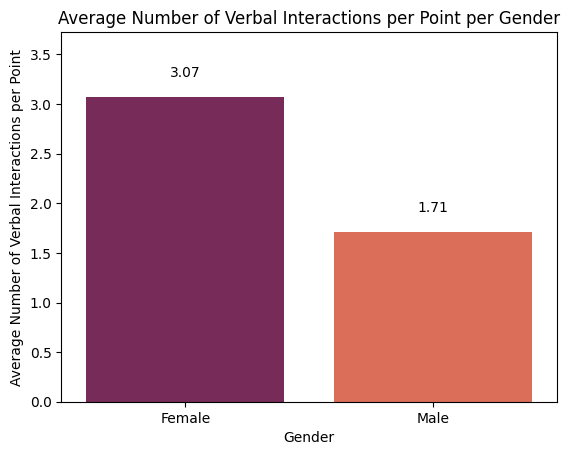

In [15]:
# Define a function to count verbal interactions
def count_verbal_interactions(cell):
    if pd.isna(cell) or cell == '':
        return 0
    return len(cell.split(','))

# Identify columns that contain verbal encouragement data
verbal_encouragement_columns = [col for col in df.columns if 'who_talked_to_who?' in col]

# Apply the count_verbal_interactions function to each cell in the verbal encouragement columns
df['verbal_encouragement_count'] = df[verbal_encouragement_columns].applymap(count_verbal_interactions).sum(axis=1)

# Calculate the total number of verbal interactions by gender
total_verbal_interactions_by_gender = df.groupby('team_sex')['verbal_encouragement_count'].sum()

# Find the total number of rows for each gender (assuming each row is a point)
total_points_by_gender = df.groupby('team_sex').size()

# Calculate the average number of verbal interactions per point per gender
average_verbal_interactions_per_point_per_gender = total_verbal_interactions_by_gender / total_points_by_gender

# PLOTTING
ax = sns.barplot(x=average_verbal_interactions_per_point_per_gender.index, y=average_verbal_interactions_per_point_per_gender.values, palette='rocket')
# Add title and labels
plt.title('Average Number of Verbal Interactions per Point per Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Verbal Interactions per Point')
# Loop over the bars and add the data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.1),  # The 0.1 adds a slight height to the annotations
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')
# Adjust the y-axis to add more space at the top of the plot
ymax = ax.get_ylim()[1]  # Get current maximum y-value
ax.set_ylim(top=ymax + 0.5)  # Increase maximum y-value to make room for annotations
plt.show()


C:\Users\trist\AppData\Local\Temp\ipykernel_30608\4067907433.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=interaction_counts_series.index, y=interaction_counts_series.values, palette='viridis')


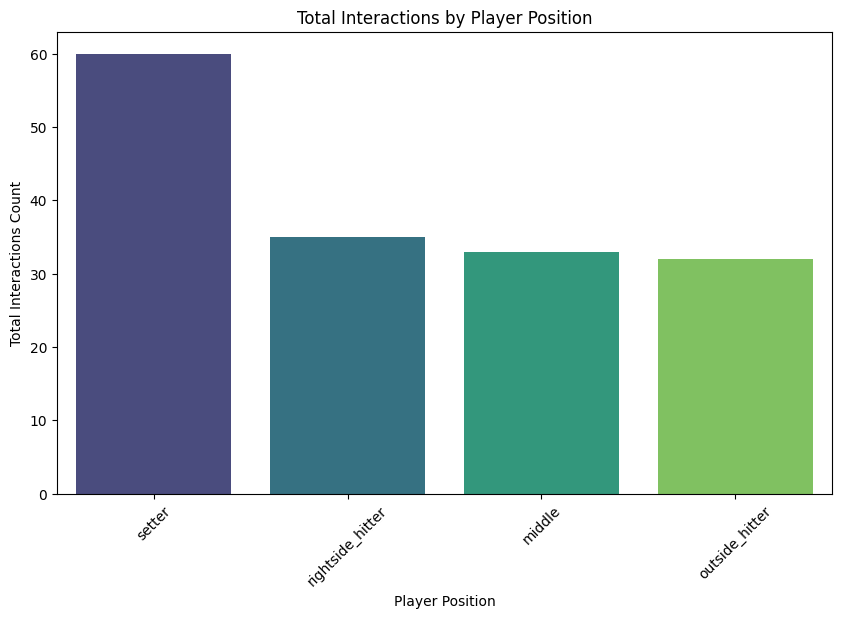

In [17]:
def count_interactions(cell):
    # Ensure the function operates on strings and handles NaN values or unexpected data types gracefully
    if pd.isna(cell):
        return 0
    elif isinstance(cell, str):
        # Correctly split strings and return count
        return len(cell.split(', ')) if cell != '' else 0
    else:
        # Log unexpected data type for debugging
        print(f"Unexpected data type in cell: {cell}")
        return 0
interaction_counts = {}
# Apply this function across your DataFrame's relevant columns
for col in df.columns:
    if 'who_high-fived_who?' in col or 'who_talked_to_who?' in col:
        position = col.split('[')[-1].split(']')[0].lower()
        # Explicitly ensure each cell is processed as expected
        counts = df[col].apply(lambda x: count_interactions(x))
        total_count = counts.sum()
        # Accumulate counts by position
        interaction_counts[position] = interaction_counts.get(position, 0) + total_count
        
interaction_counts_series = pd.Series(interaction_counts).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=interaction_counts_series.index, y=interaction_counts_series.values, palette='viridis')
plt.title('Total Interactions by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Total Interactions Count')
plt.xticks(rotation=45)

plt.show()